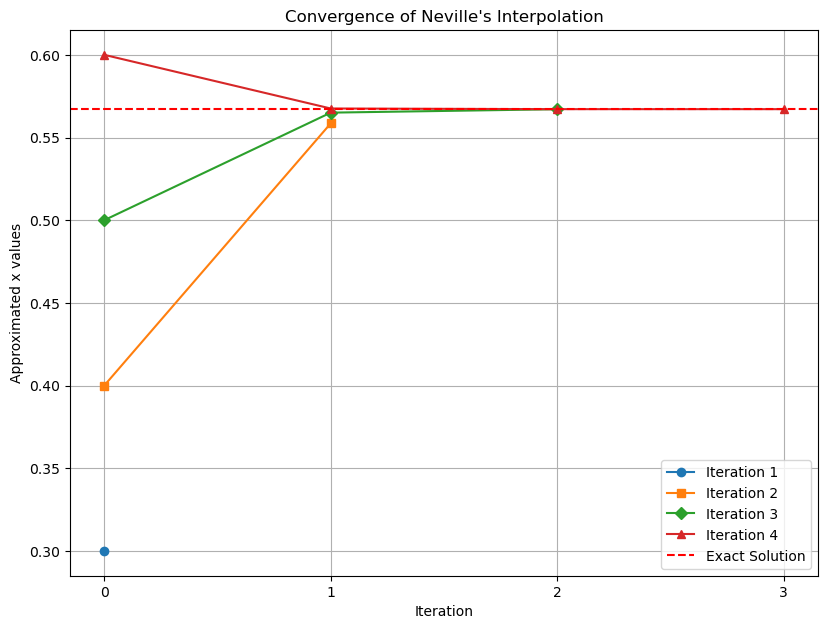

Neville's Interpolation Table:
[[0.3        0.         0.         0.        ]
 [0.4        0.55854731 0.         0.        ]
 [0.5        0.56504161 0.56711122 0.        ]
 [0.6        0.56754481 0.56714627 0.56714262]]
Approximated solution for x (where y=x -e^(-x)): 0.5671426235278707
Relative error: 0.000118%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given data points for x and corresponding y values for y = x - e^(-x)
x_vals = np.array([0.3, 0.4, 0.5, 0.6])  # x-values
y_vals = np.array([0.740818, 0.670320, 0.606531, 0.548812])  # e^(-x) values
y_vals = x_vals - y_vals  # Calculate y = x - e^(-x)

# Function to perform Neville's iterated interpolation
def neville_method(y_target, x_vals, y_vals):
    n = len(x_vals)
    Q = np.zeros((n, n))
    
    # Initialize the first column of Q with x-values
    Q[:, 0] = x_vals
    
    # Iteratively fill in the table using the recursive formula
    for i in range(1, n):
        for j in range(1, i + 1):
            Q[i, j] = ((y_target - y_vals[i - j]) * Q[i, j - 1] - (y_target - y_vals[i]) * Q[i - 1, j - 1]) / (y_vals[i] - y_vals[i - j])
    
    return Q

# Target value: we're trying to solve x - e^(-x) = 0, so y_target = 0
y_target = 0  # Approximation of the root of x - e^(-x)

# Apply Neville's method
Q = neville_method(y_target, x_vals, y_vals)

# The solution is the bottom-right value of the Neville table
approx_x = Q[-1, -1]

# Exact solution (from external methods or theory)
exact_solution = 0.56714329

# Calculate relative error
relative_error = abs((approx_x - exact_solution) / exact_solution) * 100

# Plotting the convergence graph
plt.figure(figsize=(16, 12))

# Convergence Graph
plt.subplot(2, 2, 1)
markers = ['o', 's', 'D', '^']
for i in range(Q.shape[0]):
    plt.plot(Q[i, :i+1], label=f'Iteration {i+1}', marker=markers[i % len(markers)])
plt.axhline(y=exact_solution, color='red', linestyle='--', label='Exact Solution')
plt.title("Convergence of Neville's Interpolation")
plt.xlabel("Iteration")
plt.ylabel("Approximated x values")
plt.xticks(range(len(x_vals)))
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

# Output the table and the result
print("Neville's Interpolation Table:")
print(Q)
print(f"Approximated solution for x (where y=x -e^(-x)): {approx_x}")
print(f"Relative error: {relative_error:.6f}%")

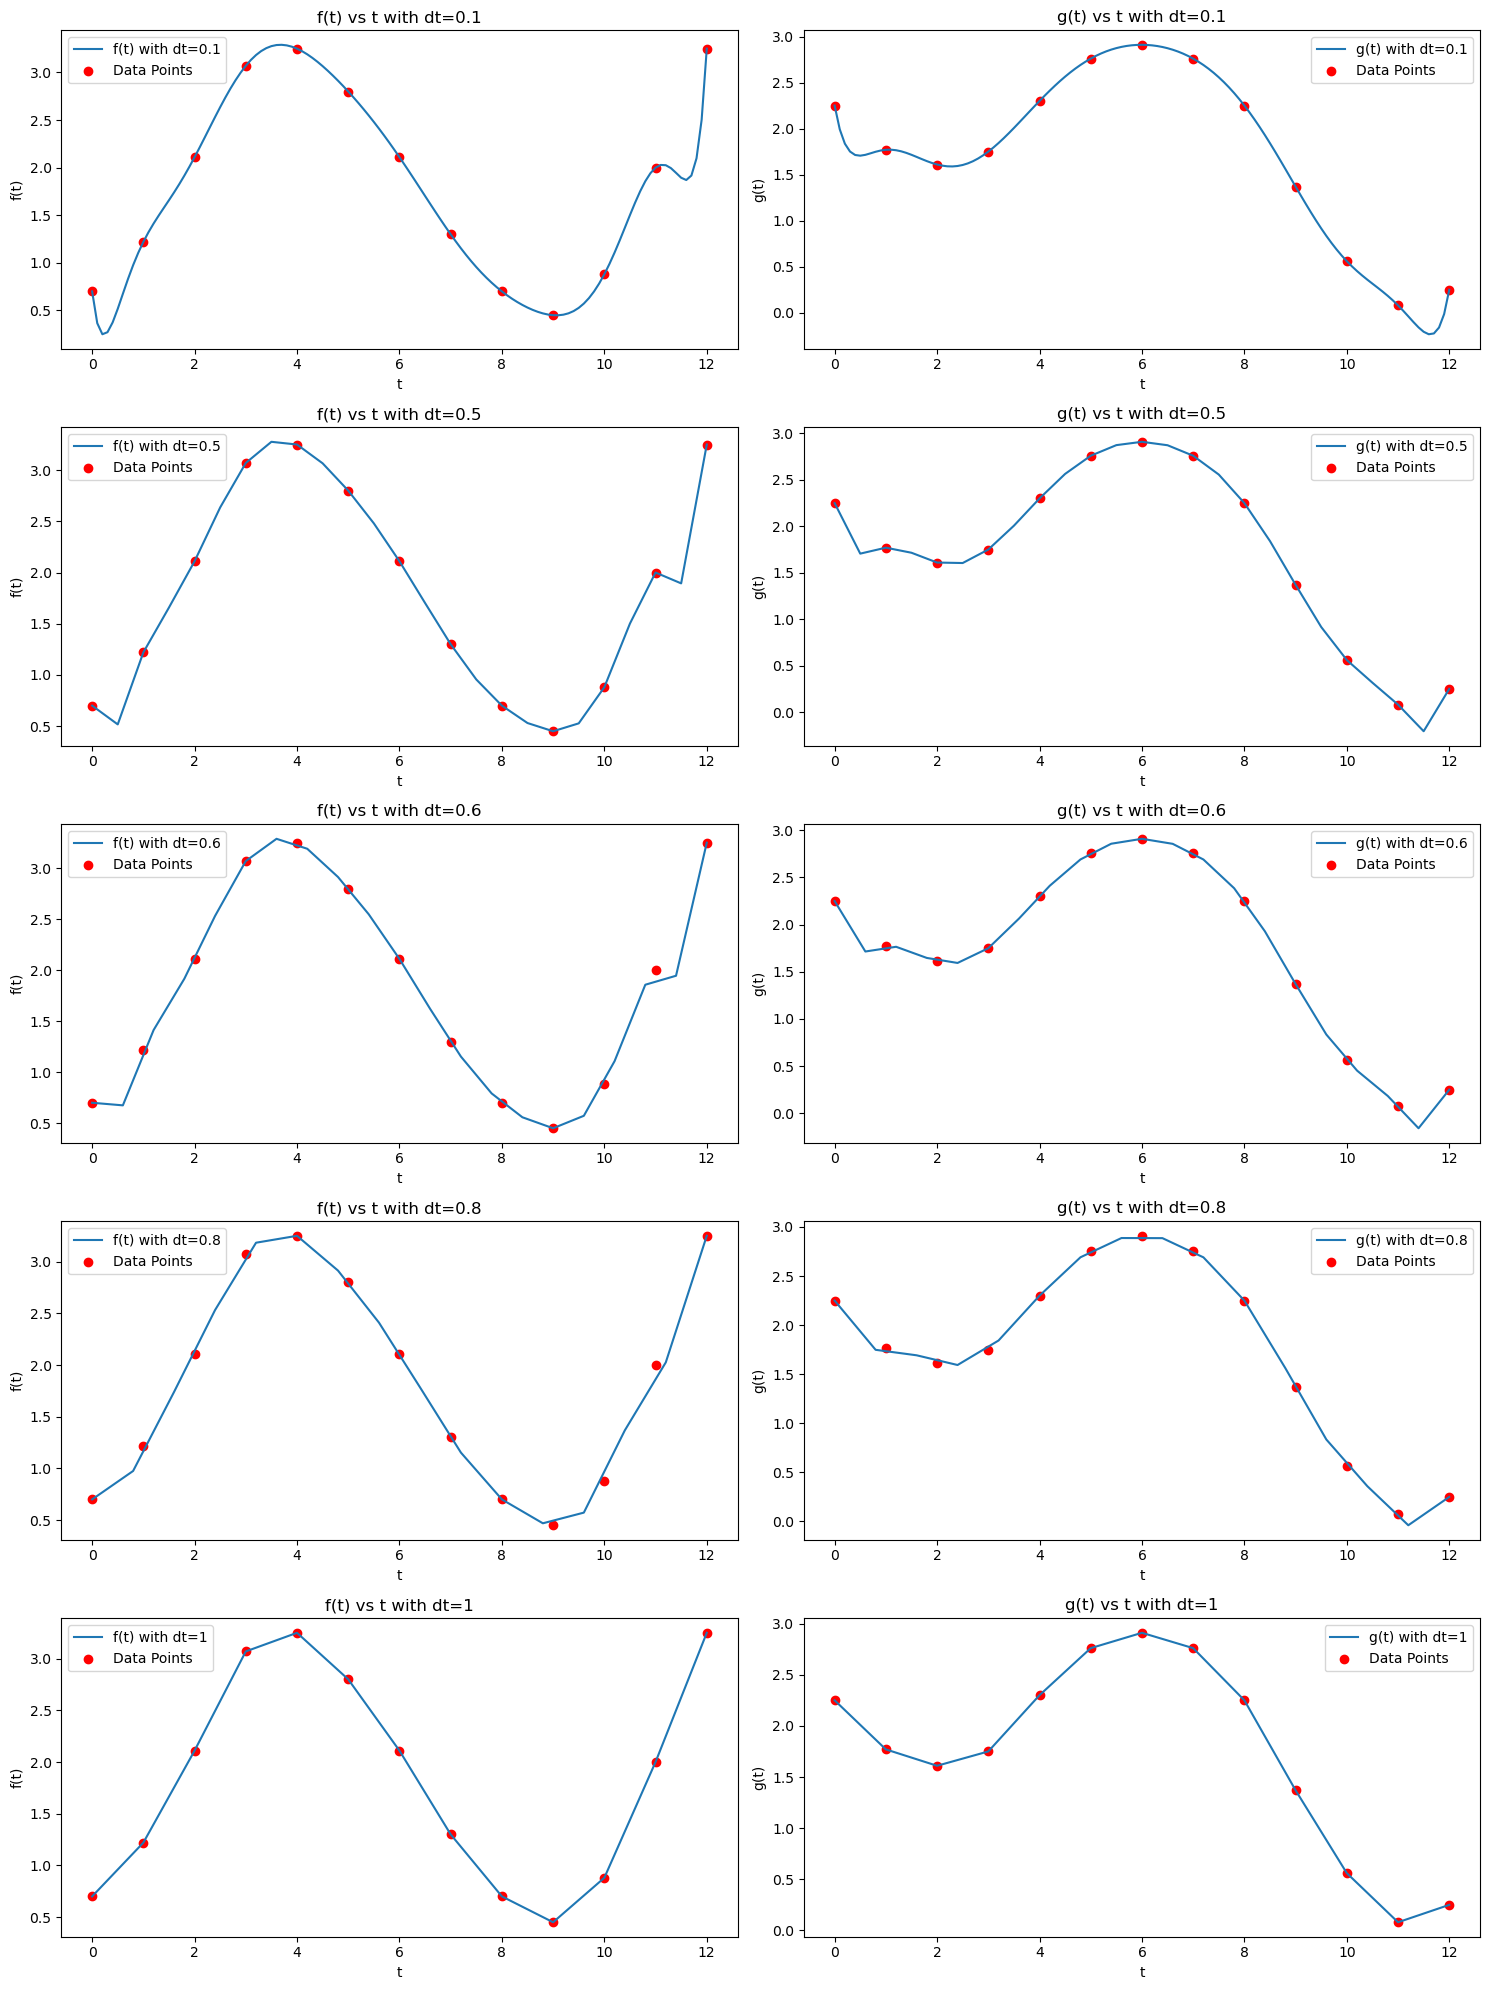

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
t_vals = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
x_vals = np.array([0.70, 1.22, 2.11, 3.07, 3.25, 2.80, 2.11, 1.30, 0.70, 0.45, 0.88, 2.00, 3.25])
y_vals = np.array([2.25, 1.77, 1.61, 1.75, 2.30, 2.76, 2.91, 2.76, 2.25, 1.37, 0.56, 0.08, 0.25])

# Function to perform Neville's Algorithm
def neville(t_vals, y_vals, t_target):
    n = len(t_vals)
    P = np.zeros((n, n))
    P[:, 0] = y_vals  # P[i, 0] contains the known y values
    
    for j in range(1, n):
        for i in range(n - j):
            P[i, j] = ((t_target - t_vals[i + j]) * P[i, j - 1] - (t_target - t_vals[i]) * P[i + 1, j - 1]) / (t_vals[i] - t_vals[i + j])
    
    return P[0, n - 1]

# List of dt values to test
dt_values = [0.1, 0.5,0.6,0.8,1]

# Plotting setup
plt.figure(figsize=(15, 20))

# Interpolated shapes
for idx, dt in enumerate(dt_values):
    t_interp = np.arange(0.0, 12.0 + dt, dt)
    f_interp = [neville(t_vals, x_vals, t) for t in t_interp]
    g_interp = [neville(t_vals, y_vals, t) for t in t_interp]
    
    # Plot f(t) vs t
    plt.subplot(len(dt_values), 2, 2 * idx + 1)
    plt.plot(t_interp, f_interp, label=f'f(t) with dt={dt}')
    plt.scatter(t_vals, x_vals, color='red', label='Data Points')
    plt.title(f'f(t) vs t with dt={dt}')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.legend()
    
    # Plot g(t) vs t
    plt.subplot(len(dt_values), 2, 2 * idx + 2)
    plt.plot(t_interp, g_interp, label=f'g(t) with dt={dt}')
    plt.scatter(t_vals, y_vals, color='red', label='Data Points')
    plt.title(f'g(t) vs t with dt={dt}')
    plt.xlabel('t')
    plt.ylabel('g(t)')
    plt.legend()

plt.tight_layout()
plt.show()

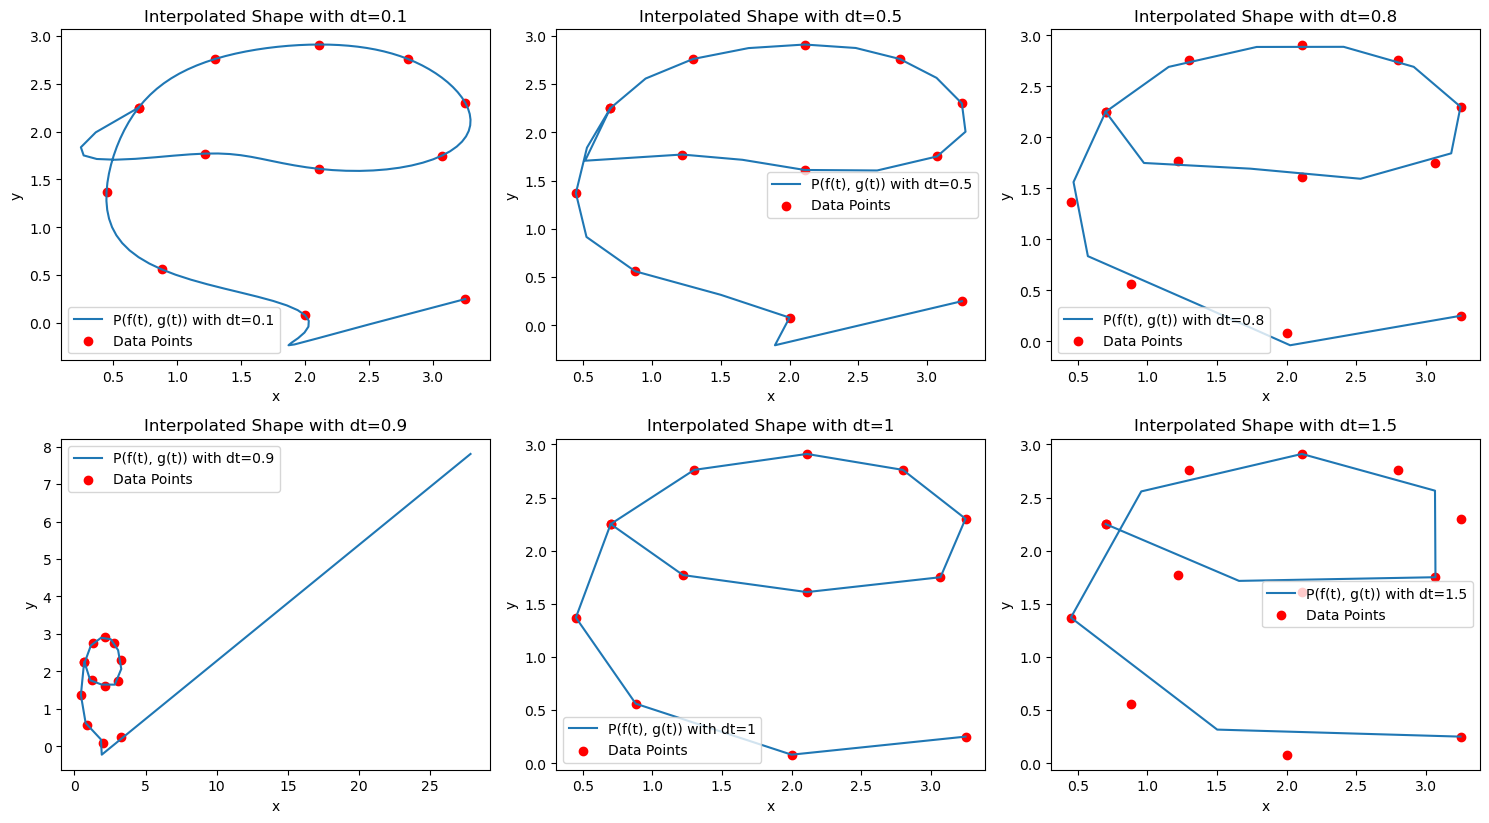

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
t_vals = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
x_vals = np.array([0.70, 1.22, 2.11, 3.07, 3.25, 2.80, 2.11, 1.30, 0.70, 0.45, 0.88, 2.00, 3.25])
y_vals = np.array([2.25, 1.77, 1.61, 1.75, 2.30, 2.76, 2.91, 2.76, 2.25, 1.37, 0.56, 0.08, 0.25])

# Function to perform Neville's Algorithm
def neville(t_vals, y_vals, t_target):
    n = len(t_vals)
    P = np.zeros((n, n))
    P[:, 0] = y_vals  # P[i, 0] contains the known y values
    
    for j in range(1, n):
        for i in range(n - j):
            P[i, j] = ((t_target - t_vals[i + j]) * P[i, j - 1] - (t_target - t_vals[i]) * P[i + 1, j - 1]) / (t_vals[i] - t_vals[i + j])
    
    return P[0, n - 1]

# List of dt values to test
dt_values = [0.1,0.5, 0.8, 0.9, 1,1.5]

# Placeholder for error calculations
errors = []

# Generate interpolation points
interp_t = np.arange(0.0, 12.0, 0.01)
true_x_vals = np.array([neville(t_vals, x_vals, t) for t in interp_t])
true_y_vals = np.array([neville(t_vals, y_vals, t) for t in interp_t])

# Plotting setup
plt.figure(figsize=(15, 12))

# Interpolated shapes
for idx, dt in enumerate(dt_values):
    t_interp = np.arange(0.0, 12.0 + dt, dt)
    f_interp = [neville(t_vals, x_vals, t) for t in t_interp]
    g_interp = [neville(t_vals, y_vals, t) for t in t_interp]
    
    # Calculate error (using true values for error calculation)
    true_f_vals = np.array([neville(t_vals, x_vals, t) for t in t_interp])
    error = np.sqrt(np.mean((f_interp - true_f_vals)**2))  # RMSE for f_interp
    errors.append(error)

    # Plot the interpolated shape P(f(t), g(t))
    plt.subplot(3, 3, idx + 1)
    plt.plot(f_interp, g_interp, label=f'P(f(t), g(t)) with dt={dt}')
    plt.scatter(x_vals, y_vals, color='red', label='Data Points')
    plt.title(f'Interpolated Shape with dt={dt}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()



plt.tight_layout()
plt.show()




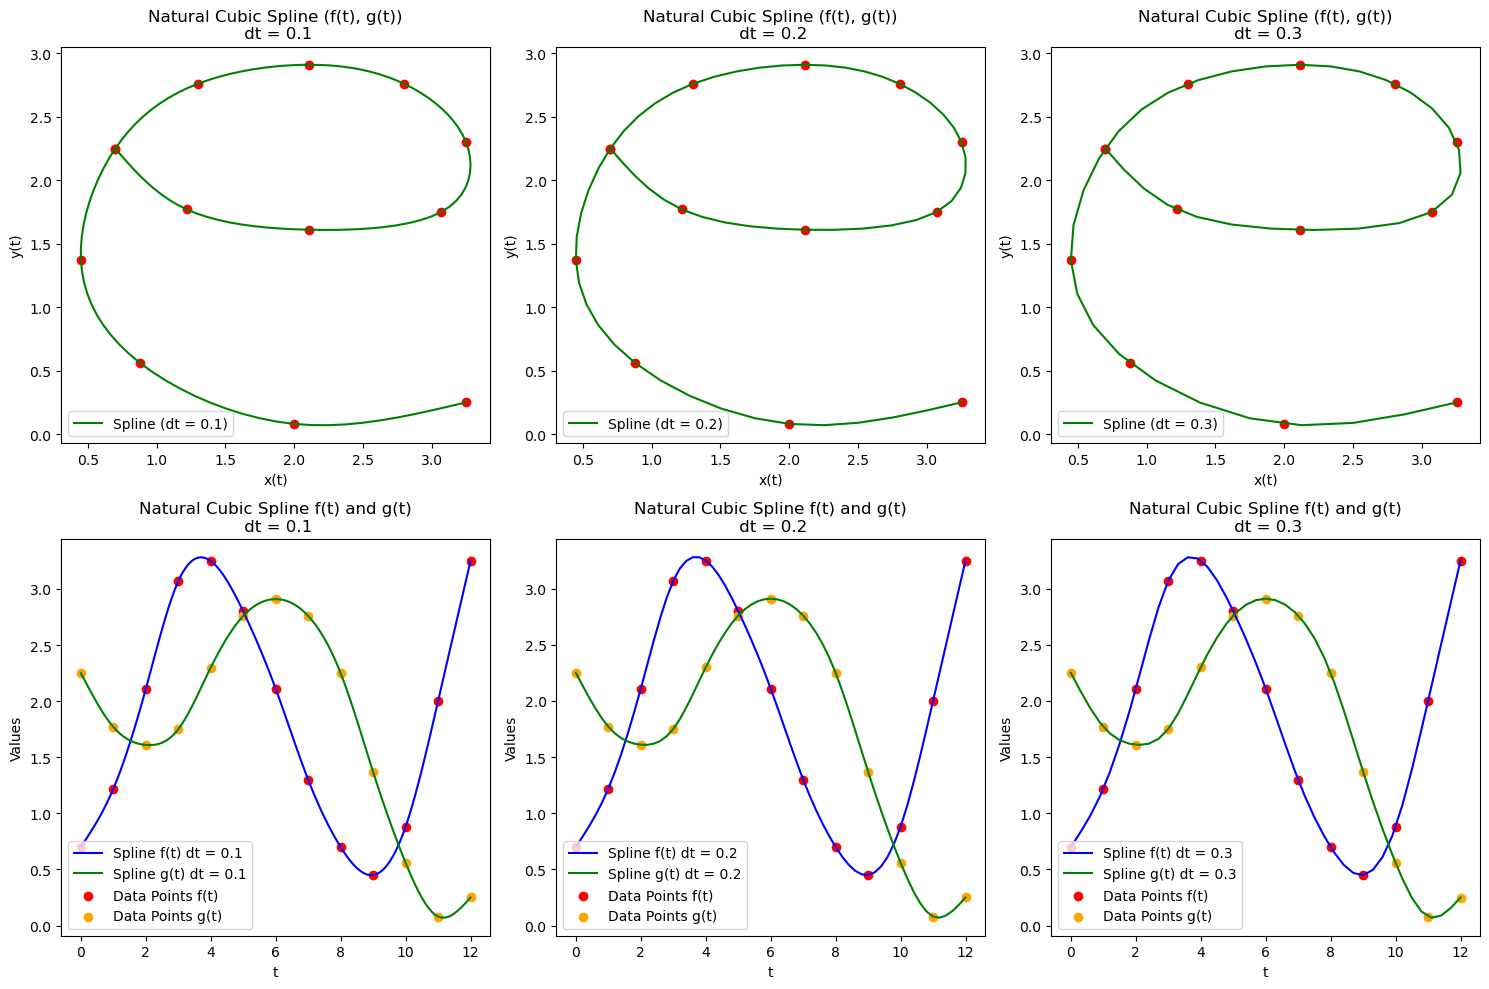

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
t_vals = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
x_vals = np.array([0.70, 1.22, 2.11, 3.07, 3.25, 2.80, 2.11, 1.30, 0.70, 0.45, 0.88, 2.00, 3.25])
y_vals = np.array([2.25, 1.77, 1.61, 1.75, 2.30, 2.76, 2.91, 2.76, 2.25, 1.37, 0.56, 0.08, 0.25])

# Function to compute natural cubic spline
def natural_cubic_spline(t, y):
    n = len(t) - 1
    h = np.diff(t)  # Step 1: Compute h_i = x_{i+1} - x_i
    
    # Step 2: Compute alphaa
    alpha = np.zeros(n)
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (y[i+1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1])
    
    # Step 3-5: Solve the tridiagonal system
    l = np.ones(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)
    
    for i in range(1, n):
        l[i] = 2 * (t[i+1] - t[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
    # Step 6: Back substitution to solve for b, c, and d coefficients
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        c[i] = z[i] - mu[i] * c[i+1]
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (c[i+1] + 2 * c[i]) / 3
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
    
    a = y[:-1]  # Coefficient a_j = y_j
    
    return a, b, c[:-1], d

# Evaluate spline at a given t_val
def evaluate_spline(t, a, b, c, d, t_val):
    n = len(t) - 1
    for i in range(n):
        if t[i] <= t_val <= t[i+1]:
            return a[i] + b[i]*(t_val - t[i]) + c[i]*(t_val - t[i])**2 + d[i]*(t_val - t[i])**3
    return None

# Different dt values to test
dt_values = [0.1,0.2,0.3]

# Calculate spline coefficients for x(t) and y(t)
a_x, b_x, c_x, d_x = natural_cubic_spline(t_vals, x_vals)
a_y, b_y, c_y, d_y = natural_cubic_spline(t_vals, y_vals)

# Plot the results for each dt value
plt.figure(figsize=(15, 10))

for idx, dt in enumerate(dt_values):
    t_interp = np.arange(0.0, 12.0 + dt, dt)

    # Evaluate the spline for x(t) and y(t) at the fine grid points
    f_spline = [evaluate_spline(t_vals, a_x, b_x, c_x, d_x, t_val) for t_val in t_interp]
    g_spline = [evaluate_spline(t_vals, a_y, b_y, c_y, d_y, t_val) for t_val in t_interp]

    # Natural cubic spline parametric curve
    plt.subplot(2, 3, idx + 1)
    plt.plot(f_spline, g_spline, label=f"Spline (dt = {dt})", color='green')
    plt.scatter(x_vals, y_vals, color='red')
    plt.title(f'Natural Cubic Spline (f(t), g(t))\n dt = {dt}')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.legend()

    # Plot f(t) and g(t) for Natural Cubic Spline interpolation
    plt.subplot(2, 3, idx + 4)
    plt.plot(t_interp, f_spline, label=f"Spline f(t) dt = {dt}", color='blue')
    plt.plot(t_interp, g_spline, label=f"Spline g(t) dt = {dt}", color='green')
    plt.scatter(t_vals, x_vals, color='red', label='Data Points f(t)')
    plt.scatter(t_vals, y_vals, color='orange', label='Data Points g(t)')
    plt.title(f"Natural Cubic Spline f(t) and g(t)\n dt = {dt}")
    plt.xlabel('t')
    plt.ylabel('Values')
    plt.legend()

plt.tight_layout()
plt.show()


Natural Cubic Spline Coefficients:
a_x: [0.7  1.22 2.11 3.07 3.25 2.8  2.11 1.3  0.7  0.45 0.88 2.  ]
b_x: [ 0.43791458  0.68417084  1.05540205  0.64422095 -0.21228584 -0.60507758
 -0.78740385 -0.74530704 -0.461368    0.04077905  0.83825179  1.25621377]
c_x: [ 0.          0.24625626  0.12497495 -0.53615605 -0.32035074 -0.072441
 -0.10988527  0.15198208  0.13195695  0.3701901   0.42728264 -0.00932066]
d_x: [ 0.08208542 -0.04042711 -0.220377    0.07193511  0.08263658 -0.01248142
  0.08728912 -0.00667504  0.07941105  0.01903085 -0.14553443  0.00310689]
a_y: [2.25 1.77 1.61 1.75 2.3  2.76 2.91 2.76 2.25 1.37 0.56 0.08]
b_y: [-5.52213337e-01 -3.35573327e-01 -2.54933572e-02  3.77546755e-01
  5.85306335e-01  3.11227903e-01 -2.17948718e-04 -3.10356108e-01
 -7.38357617e-01 -9.06213422e-01 -7.06788694e-01 -1.36631802e-01]
c_y: [ 0.          0.21664001  0.09343996  0.30960015 -0.10184057 -0.17223786
 -0.13920799 -0.17093017 -0.25707134  0.08921554  0.11020919  0.4599477 ]
d_y: [ 0.07221334 -0.041

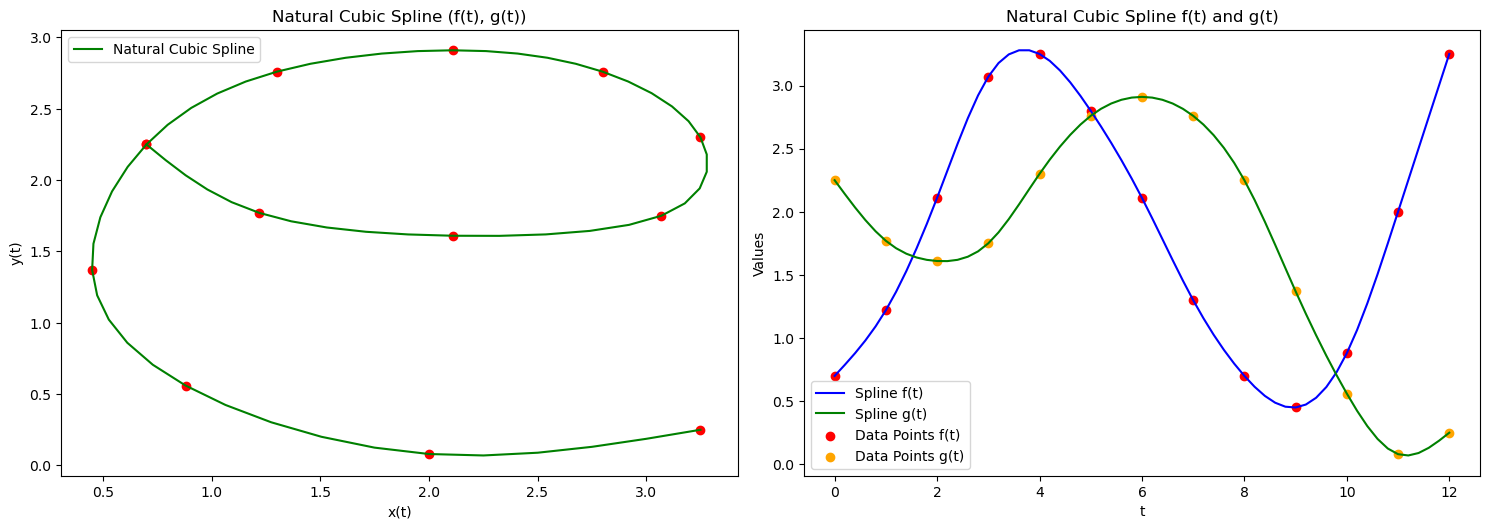

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
t_vals = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
x_vals = np.array([0.70, 1.22, 2.11, 3.07, 3.25, 2.80, 2.11, 1.30, 0.70, 0.45, 0.88, 2.00, 3.25])
y_vals = np.array([2.25, 1.77, 1.61, 1.75, 2.30, 2.76, 2.91, 2.76, 2.25, 1.37, 0.56, 0.08, 0.25])

# Function to compute natural cubic spline
def natural_cubic_spline(t, y):
    n = len(t) - 1
    h = np.diff(t)  # Step 1: Compute h_i = x_{i+1} - x_i
    
    # Step 2: Compute alpha
    alpha = np.zeros(n)
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (y[i+1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1])
    
    # Step 3-5: Solve the tridiagonal system
    l = np.ones(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)
    
    for i in range(1, n):
        l[i] = 2 * (t[i+1] - t[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
    # Step 6: Back substitution to solve for b, c, and d coefficients
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        c[i] = z[i] - mu[i] * c[i+1]
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (c[i+1] + 2 * c[i]) / 3
        d[i] = (c[i+1] - c[i]) / (3 * h[i])
    
    a = y[:-1]  # Coefficient a_j = y_j
    
    return a, b, c[:-1], d

# Evaluate spline at a given t_val
def evaluate_spline(t, a, b, c, d, t_val):
    n = len(t) - 1
    for i in range(n):
        if t[i] <= t_val <= t[i+1]:
            return a[i] + b[i]*(t_val - t[i]) + c[i]*(t_val - t[i])**2 + d[i]*(t_val - t[i])**3
    return None

# Define a fine grid for t to evaluate the splines
dt = 0.2
t_interp = np.arange(0.0, 12.0 + dt, dt)

# Calculate spline coefficients for x(t) and y(t)
a_x, b_x, c_x, d_x = natural_cubic_spline(t_vals, x_vals)
a_y, b_y, c_y, d_y = natural_cubic_spline(t_vals, y_vals)
#print(a_x, b_x, c_x, d_x)
#print(a_y, b_y, c_y, d_y)
print("Natural Cubic Spline Coefficients:")
print("a_x:", a_x)
print("b_x:", b_x)
print("c_x:", c_x)
print("d_x:", d_x)
print("a_y:", a_y)
print("b_y:", b_y)
print("c_y:", c_y)
print("d_y:", d_y)

# Evaluate the spline for x(t) and y(t) at the fine grid points
f_spline = [evaluate_spline(t_vals, a_x, b_x, c_x, d_x, t_val) for t_val in t_interp]
g_spline = [evaluate_spline(t_vals, a_y, b_y, c_y, d_y, t_val) for t_val in t_interp]

# Plot the results for Natural Cubic Spline interpolation
plt.figure(figsize=(15, 10))

# Natural cubic spline parametric curve
plt.subplot(2, 2, 1)
plt.plot(f_spline, g_spline, label="Natural Cubic Spline", color='green')
plt.scatter(x_vals, y_vals, color='red')
plt.title('Natural Cubic Spline (f(t), g(t))')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()

# Plot f(t) and g(t) for Natural Cubic Spline interpolation
plt.subplot(2, 2, 2)
plt.plot(t_interp, f_spline, label="Spline f(t)", color='blue')
plt.plot(t_interp, g_spline, label="Spline g(t)", color='green')
plt.scatter(t_vals, x_vals, color='red', label='Data Points f(t)')
plt.scatter(t_vals, y_vals, color='orange', label='Data Points g(t)')
plt.title("Natural Cubic Spline f(t) and g(t)")
plt.xlabel('t')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()


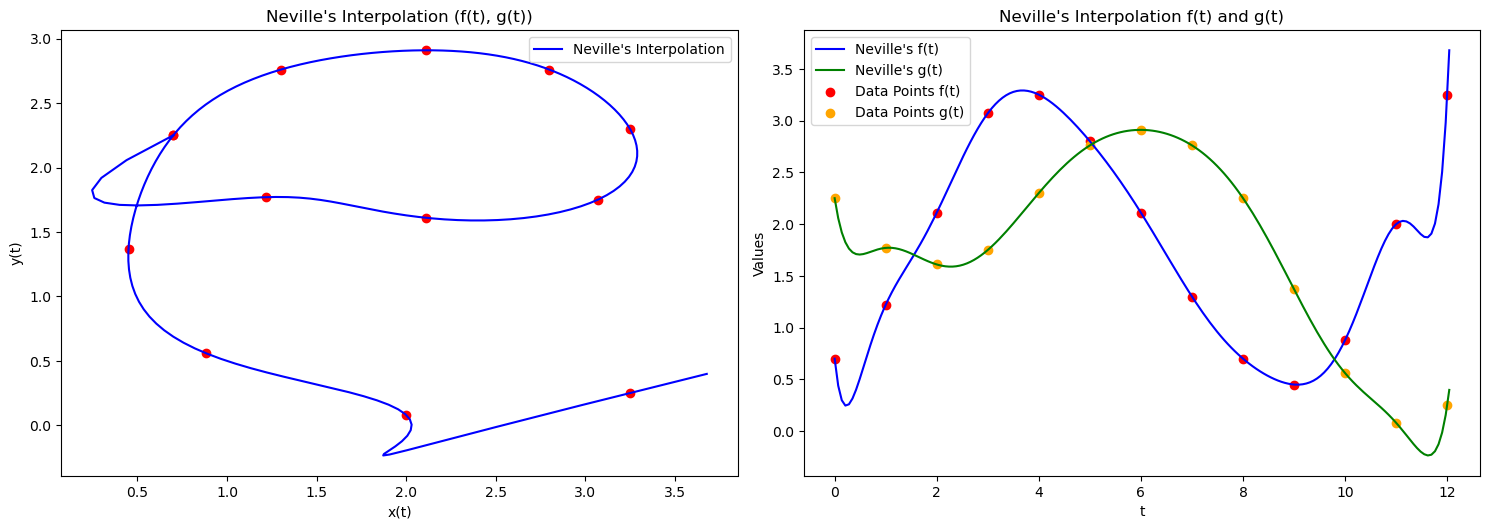

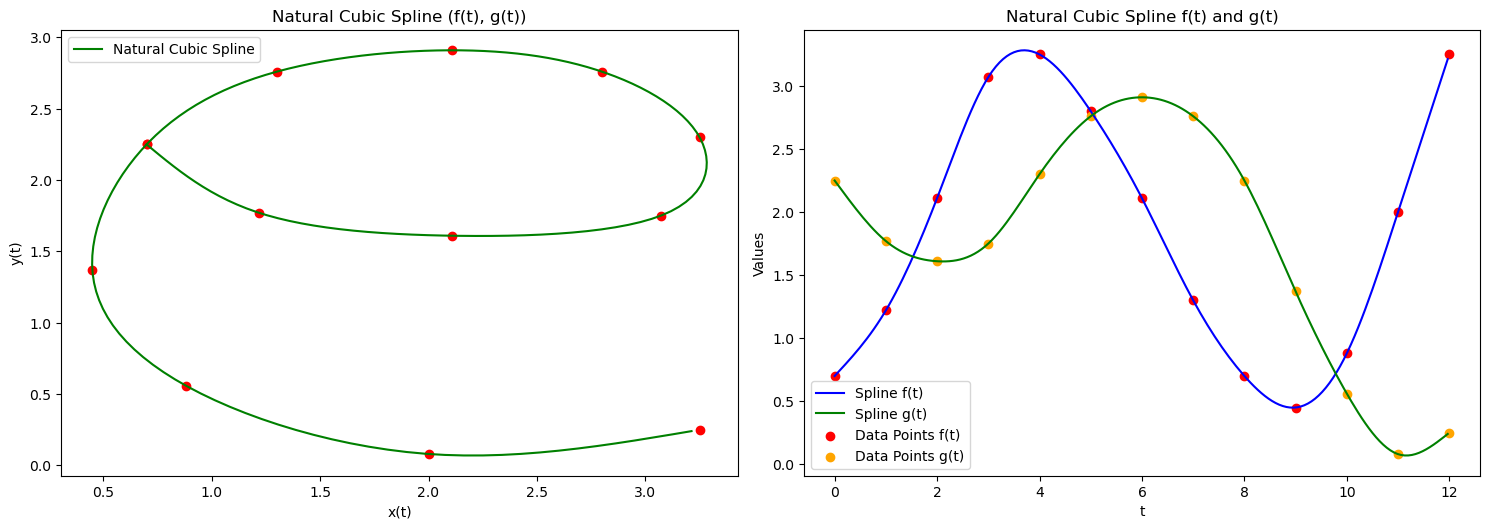

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
t_vals = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
x_vals = np.array([0.70, 1.22, 2.11, 3.07, 3.25, 2.80, 2.11, 1.30, 0.70, 0.45, 0.88, 2.00, 3.25])
y_vals = np.array([2.25, 1.77, 1.61, 1.75, 2.30, 2.76, 2.91, 2.76, 2.25, 1.37, 0.56, 0.08, 0.25])

# Neville's Algorithm for interpolation
def neville(t_vals, y_vals, t_target):
    n = len(t_vals)
    P = np.zeros((n, n))
    P[:, 0] = y_vals  # P[i, 0] contains the known y values
    
    for j in range(1, n):
        for i in range(n - j):
            P[i, j] = ((t_target - t_vals[i + j]) * P[i, j - 1] - (t_target - t_vals[i]) * P[i + 1, j - 1]) / (t_vals[i] - t_vals[i + j])
    
    return P[0, n - 1]

# Natural Cubic Spline Algorithm
def natural_cubic_spline(t, y):
    n = len(t) - 1
    h = np.diff(t)  # h_i = t_(i+1) - t_i
    alpha = np.zeros(n)
    
    # Setting up the system of equations for natural cubic spline
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (y[i+1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1])
    
    l = np.ones(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)
    
    for i in range(1, n):
        l[i] = 2 * (t[i+1] - t[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    
    # Back substitution to solve for the coefficients
    for i in range(n-1, -1, -1):
        c[i] = z[i] - mu[i] * c[i+1]
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (c[i+1] + 2*c[i]) / 3
        d[i] = (c[i+1] - c[i]) / (3*h[i])
    
    a = y[:-1]
    
    return a, b, c[:-1], d

# Evaluate spline at a given t_val
def evaluate_spline(t, a, b, c, d, t_val):
    n = len(t) - 1
    for i in range(n):
        if t[i] <= t_val <= t[i+1]:
            return a[i] + b[i]*(t_val - t[i]) + c[i]*(t_val - t[i])**2 + d[i]*(t_val - t[i])**3
    return None

# Define a fine grid for t to evaluate the splines
dt = 0.07
t_interp = np.arange(0.0, 12.0 + dt, dt)

# Neville's interpolation for x(t) and y(t)
f_neville = [neville(t_vals, x_vals, t) for t in t_interp]
g_neville = [neville(t_vals, y_vals, t) for t in t_interp]

# Compute natural cubic spline coefficients for x(t) and y(t)
a_x, b_x, c_x, d_x = natural_cubic_spline(t_vals, x_vals)
a_y, b_y, c_y, d_y = natural_cubic_spline(t_vals, y_vals)

# Evaluate the spline for x(t) and y(t) at the fine grid points
f_spline = [evaluate_spline(t_vals, a_x, b_x, c_x, d_x, t_val) for t_val in t_interp]
g_spline = [evaluate_spline(t_vals, a_y, b_y, c_y, d_y, t_val) for t_val in t_interp]

# Plot the results for Neville's interpolation
plt.figure(figsize=(15, 10))

# Neville's interpolation parametric curve
plt.subplot(2, 2, 1)
plt.plot(f_neville, g_neville, label="Neville's Interpolation", color='blue')
plt.scatter(x_vals, y_vals, color='red')
plt.title("Neville's Interpolation (f(t), g(t))")
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()

# Plot f(t) and g(t) for Neville's interpolation
plt.subplot(2, 2, 2)
plt.plot(t_interp, f_neville, label="Neville's f(t)", color='blue')
plt.plot(t_interp, g_neville, label="Neville's g(t)", color='green')
plt.scatter(t_vals, x_vals, color='red', label='Data Points f(t)')
plt.scatter(t_vals, y_vals, color='orange', label='Data Points g(t)')
plt.title("Neville's Interpolation f(t) and g(t)")
plt.xlabel('t')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the results for Natural Cubic Spline interpolation
plt.figure(figsize=(15, 10))

# Natural cubic spline parametric curve
plt.subplot(2, 2, 1)
plt.plot(f_spline, g_spline, label="Natural Cubic Spline", color='green')
plt.scatter(x_vals, y_vals, color='red')
plt.title('Natural Cubic Spline (f(t), g(t))')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()

# Plot f(t) and g(t) for Natural Cubic Spline interpolation
plt.subplot(2, 2, 2)
plt.plot(t_interp, f_spline, label="Spline f(t)", color='blue')
plt.plot(t_interp, g_spline, label="Spline g(t)", color='green')
plt.scatter(t_vals, x_vals, color='red', label='Data Points f(t)')
plt.scatter(t_vals, y_vals, color='orange', label='Data Points g(t)')
plt.title("Natural Cubic Spline f(t) and g(t)")
plt.xlabel('t')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()